<a href="https://colab.research.google.com/github/AllisonOge/predictive_modeling/blob/main/predictive_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [2]:
%matplotlib inline
# increase the figure size
sns.set(rc={'figure.figsize': (15, 5)})
sns.set_style("whitegrid")

In [3]:
sensor_df = pd.read_csv("https://raw.githubusercontent.com/AllisonOge/predictive_modeling/main/data/sensor_ml.csv", index_col="id")
# sensor_df = pd.read_csv("sensor_ml.csv", index_col="id")

In [4]:
sensor_df

,chan_1,chan_2,chan_3,chan_4,created_at
id,,,,,
1,1,0,0,0,2022-11-15 16:14:18.829480
2,1,0,0,0,2022-11-15 16:14:18.914676
3,1,0,0,0,2022-11-15 16:14:18.983745
4,1,0,0,0,2022-11-15 16:14:19.059611
5,1,0,0,0,2022-11-15 16:14:19.134008
...,...,...,...,...,...
23566,1,1,1,1,2022-11-15 16:44:18.563776
23567,1,1,1,1,2022-11-15 16:44:18.693114
23568,1,1,1,1,2022-11-15 16:44:18.755782


In [5]:
pd.__version__

'1.3.5'

In [6]:
sensor_df.groupby("created_at")["chan_1"].value_counts()

created_at                  chan_1
2022-11-15 16:14:18.829480  1         1
2022-11-15 16:14:18.914676  1         1
2022-11-15 16:14:18.983745  1         1
2022-11-15 16:14:19.059611  1         1
2022-11-15 16:14:19.134008  1         1
                                     ..
2022-11-15 16:44:18.563776  1         1
2022-11-15 16:44:18.693114  1         1
2022-11-15 16:44:18.755782  1         1
2022-11-15 16:44:18.819509  1         1
2022-11-15 16:44:18.885257  1         1
Name: chan_1, Length: 23570, dtype: int64

In [7]:
sensor_df.groupby("created_at")["chan_2"].value_counts()

created_at                  chan_2
2022-11-15 16:14:18.829480  0         1
2022-11-15 16:14:18.914676  0         1
2022-11-15 16:14:18.983745  0         1
2022-11-15 16:14:19.059611  0         1
2022-11-15 16:14:19.134008  0         1
                                     ..
2022-11-15 16:44:18.563776  1         1
2022-11-15 16:44:18.693114  1         1
2022-11-15 16:44:18.755782  1         1
2022-11-15 16:44:18.819509  1         1
2022-11-15 16:44:18.885257  1         1
Name: chan_2, Length: 23570, dtype: int64

In [8]:
sensor_df.groupby("created_at")["chan_3"].value_counts()

created_at                  chan_3
2022-11-15 16:14:18.829480  0         1
2022-11-15 16:14:18.914676  0         1
2022-11-15 16:14:18.983745  0         1
2022-11-15 16:14:19.059611  0         1
2022-11-15 16:14:19.134008  0         1
                                     ..
2022-11-15 16:44:18.563776  1         1
2022-11-15 16:44:18.693114  1         1
2022-11-15 16:44:18.755782  1         1
2022-11-15 16:44:18.819509  1         1
2022-11-15 16:44:18.885257  1         1
Name: chan_3, Length: 23570, dtype: int64

In [9]:
sensor_df.groupby("created_at")["chan_4"].value_counts()

created_at                  chan_4
2022-11-15 16:14:18.829480  0         1
2022-11-15 16:14:18.914676  0         1
2022-11-15 16:14:18.983745  0         1
2022-11-15 16:14:19.059611  0         1
2022-11-15 16:14:19.134008  0         1
                                     ..
2022-11-15 16:44:18.563776  1         1
2022-11-15 16:44:18.693114  1         1
2022-11-15 16:44:18.755782  1         1
2022-11-15 16:44:18.819509  1         1
2022-11-15 16:44:18.885257  1         1
Name: chan_4, Length: 23570, dtype: int64

In [10]:
sensor_copy_df = sensor_df
sensor_copy_df = sensor_copy_df.drop_duplicates(subset="created_at")
sensor_copy_df = sensor_copy_df.set_index("created_at")

In [11]:
sensor_copy_df

,chan_1,chan_2,chan_3,chan_4
created_at,,,,
2022-11-15 16:14:18.829480,1,0,0,0
2022-11-15 16:14:18.914676,1,0,0,0
2022-11-15 16:14:18.983745,1,0,0,0
2022-11-15 16:14:19.059611,1,0,0,0
2022-11-15 16:14:19.134008,1,0,0,0
...,...,...,...,...
2022-11-15 16:44:18.563776,1,1,1,1
2022-11-15 16:44:18.693114,1,1,1,1
2022-11-15 16:44:18.755782,1,1,1,1


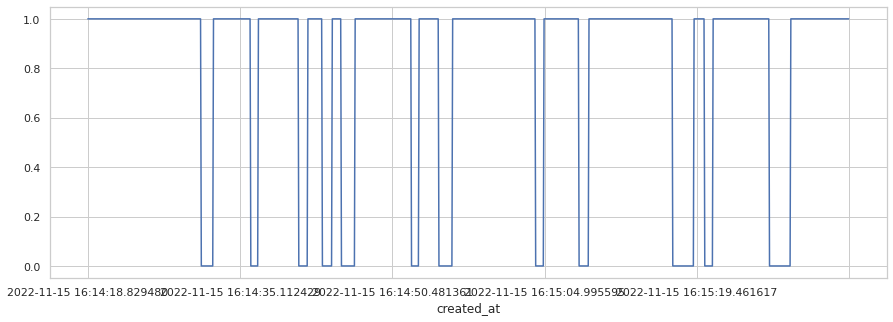

In [12]:
sensor_copy_df["chan_1"][:1000].plot()

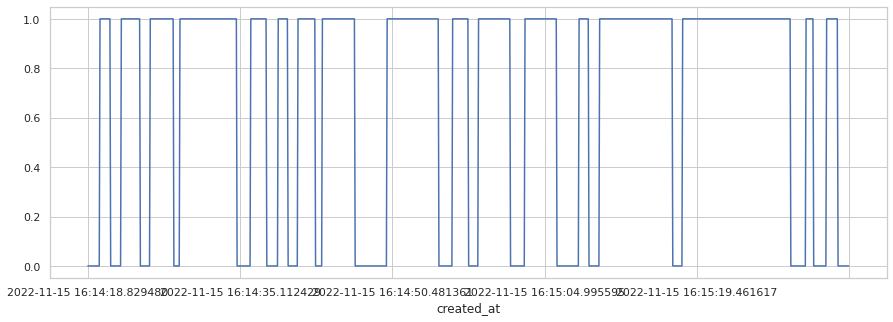

In [13]:
sensor_copy_df["chan_2"][:1000].plot()

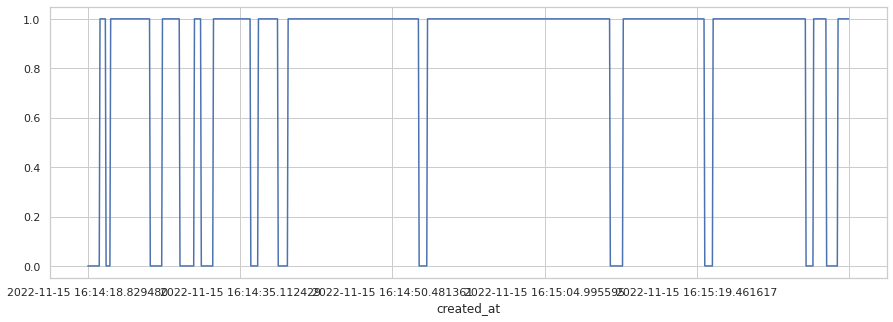

In [14]:
sensor_copy_df["chan_3"][:1000].plot()

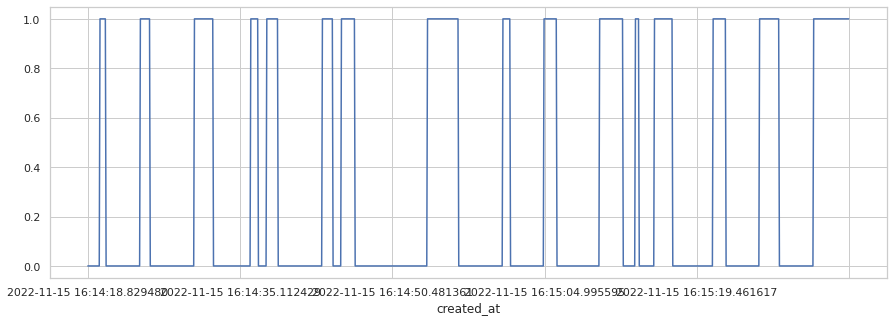

In [15]:
sensor_copy_df["chan_4"][:1000].plot()

In [16]:
def df_to_X_y(df, window_size=10):
  X = []
  y = []
  for i in range(df.shape[0]-window_size):
    X.append([r for r in df.to_numpy()[i:i+window_size]])
    y.append(df.to_numpy()[i+window_size])
  return np.array(X), np.array(y)

In [17]:
X, y =df_to_X_y(sensor_copy_df)
X.shape, y.shape

((23560, 10, 4), (23560, 4))

In [18]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

## Build the model 🧠

In [19]:
def build_model(input_shape):
  return tf.keras.models.Sequential([
      tf.keras.layers.Input(input_shape),
      tf.keras.layers.LSTM(45, return_sequences=True),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.LSTM(45),
      tf.keras.layers.Dense(8, activation="relu"),
      tf.keras.layers.Dense(4, activation="sigmoid")
  ])

In [20]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(9424, 10, 4) (9424, 4)
(7068, 10, 4) (7068, 4)
(7068, 10, 4) (7068, 4)


In [21]:
model = build_model((X.shape[1], X.shape[2]))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 45)            9000      
                                                                 
 dropout (Dropout)           (None, 10, 45)            0         
                                                                 
 lstm_1 (LSTM)               (None, 45)                16380     
                                                                 
 dense (Dense)               (None, 8)                 368       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
Total params: 25,784
Trainable params: 25,784
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss=BinaryCrossentropy(), optimizer=Adam(learning_rate=0.001), metrics=BinaryAccuracy())

In [23]:
history = model.fit(X_train, y_train, epochs=20, batch_size=30, validation_data=(X_valid, y_valid))

Epoch 1/20
315/315 [==============================] - 22s 40ms/step - loss: 0.3654 - binary_accuracy: 0.8494 - val_loss: 0.1848 - val_binary_accuracy: 0.9469
Epoch 2/20
315/315 [==============================] - 11s 35ms/step - loss: 0.1613 - binary_accuracy: 0.9578 - val_loss: 0.1242 - val_binary_accuracy: 0.9697
Epoch 3/20
315/315 [==============================] - 5s 16ms/step - loss: 0.1268 - binary_accuracy: 0.9724 - val_loss: 0.1166 - val_binary_accuracy: 0.9747
Epoch 4/20
315/315 [==============================] - 5s 16ms/step - loss: 0.1190 - binary_accuracy: 0.9758 - val_loss: 0.1083 - val_binary_accuracy: 0.9776
Epoch 5/20
315/315 [==============================] - 5s 16ms/step - loss: 0.1162 - binary_accuracy: 0.9764 - val_loss: 0.1079 - val_binary_accuracy: 0.9776
Epoch 6/20
315/315 [==============================] - 5s 16ms/step - loss: 0.1145 - binary_accuracy: 0.9766 - val_loss: 0.1072 - val_binary_accuracy: 0.9776
Epoch 7/20
315/315 [==============================] - 7s

Text(0, 0.5, 'accuracy')

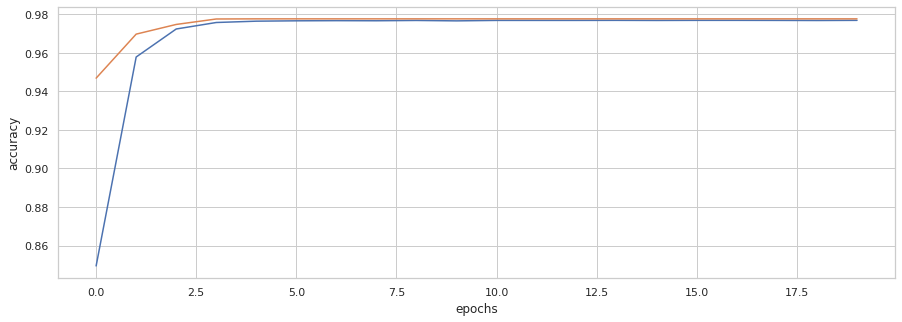

In [24]:
plt.plot(history.history["binary_accuracy"], label="Training accuracy")
plt.plot(history.history["val_binary_accuracy"], label="Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

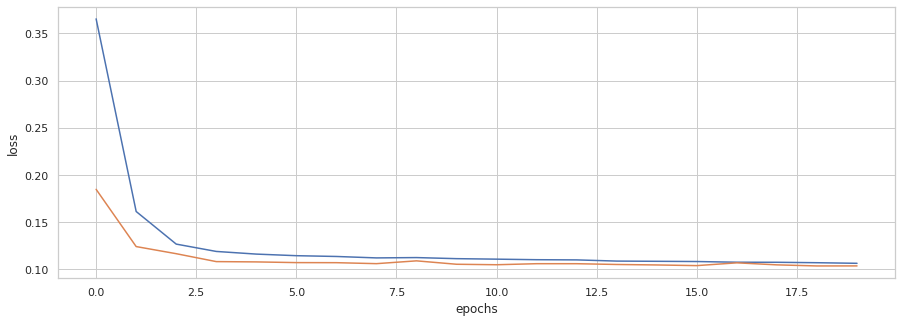

In [25]:
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")

In [26]:
test_predictions = (model.predict(X_test)>0.5).astype(int)
test_predictions 

221/221 [==============================] - 2s 4ms/step


array([[0, 1, 0, 0],
       [0, 1, 1, 1],
       [1, 0, 1, 0],
       ...,
       [1, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 0, 0]])

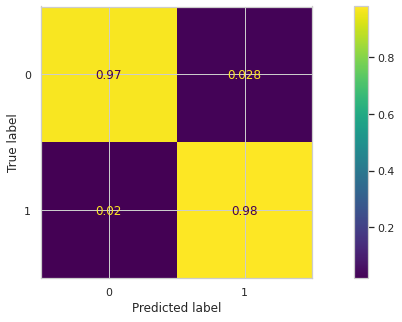

In [27]:
cm = metrics.confusion_matrix(y_test.flatten(), test_predictions.flatten(), normalize="true")
display_cm = metrics.ConfusionMatrixDisplay(cm)
display_cm.plot()

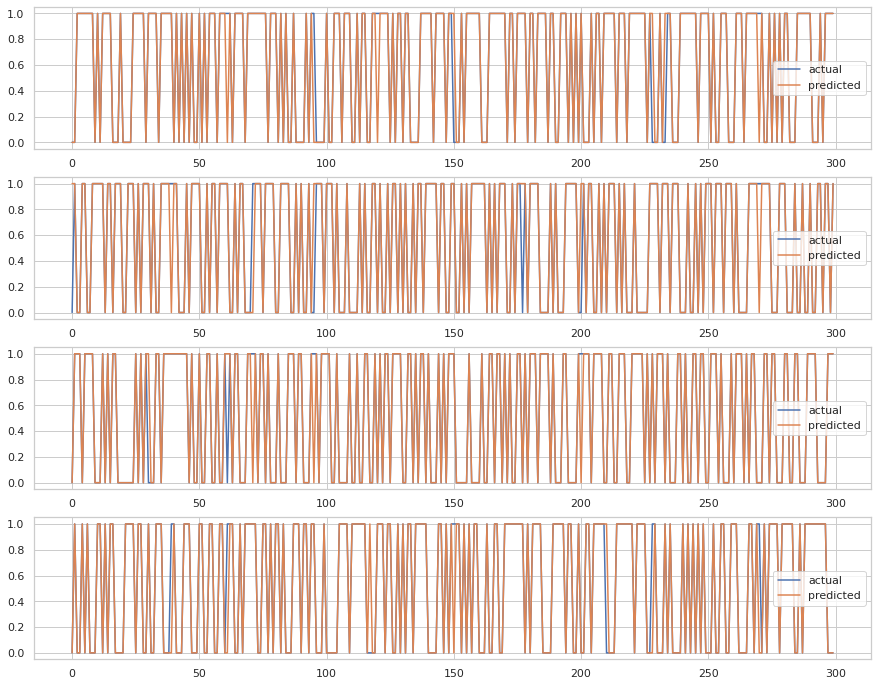

In [28]:
nchannels = y.shape[1]
fig, ax = plt.subplots(nrows=nchannels, ncols=1, figsize=(15, 12))
for i in range(nchannels):
  ax[i].plot(y_test[:300, i], label="actual")
  ax[i].plot(test_predictions[:300, i], label="predicted")
  ax[i].legend()

# Save the model 💾

In [29]:
def save_model(model, filename="model.tflite"):
  # convert the keras model to tflite
  converter = tf.lite.TFLiteConverter.from_keras_model(model)
  converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
  ]

  tflite_model = converter.convert()

  # save the tflite model
  with open(filename, "wb") as f:
    f.write(tflite_model)

In [30]:
tf.__version__

'2.9.2'

In [31]:
# save_model(model)

Hypothesis 🤔: Can my model predict the idle time for a channel?

In [32]:
def start_and_idle_time(bit_sequence):
    bit_sequence = np.asarray(bit_sequence, dtype=np.int32)
    start_time = 0
    idle_time = 0
    idle_times = []
    for i, bit in enumerate(bit_sequence):
        if i > 0:
            if bit == 0 and bit_sequence[i-1] == 1:
                # 1,0
                start_time = i
                idle_time += 1
            elif bit == 0 and bit_sequence[i-1] == 0:
                # 0,0
                idle_time += 1
            elif bit == 1 and bit_sequence[i-1] == 0:
                # 0,1
                idle_times.append((start_time, idle_time))
                idle_time = 0
        else:
            if bit == 0:
                start_time = i
                idle_time += 1

        if i == len(bit_sequence)-1 and idle_time > 0:
            idle_times.append((start_time, idle_time))
        
        if len(idle_times) > 1:
          break

    return np.array(idle_times)

In [33]:
def get_idletimes_df(df):
  idle_times = []
  for i in range(df.shape[0]):
    idle_times.append([j[0][1] if len(j) > 0 and i+j[0][0] <= i else 0 
                       for j in  list(map(start_and_idle_time, df.to_numpy()[i:].transpose()))])
    
  return pd.DataFrame(data=idle_times, index=df.index, columns=df.columns)

In [34]:
idle_times_df = get_idletimes_df(sensor_copy_df)
idle_times_df

,chan_1,chan_2,chan_3,chan_4
created_at,,,,
2022-11-15 16:14:18.829480,0,16,16,16
2022-11-15 16:14:18.914676,0,15,15,15
2022-11-15 16:14:18.983745,0,14,14,14
2022-11-15 16:14:19.059611,0,13,13,13
2022-11-15 16:14:19.134008,0,12,12,12
...,...,...,...,...
2022-11-15 16:44:18.563776,0,0,0,0
2022-11-15 16:44:18.693114,0,0,0,0
2022-11-15 16:44:18.755782,0,0,0,0


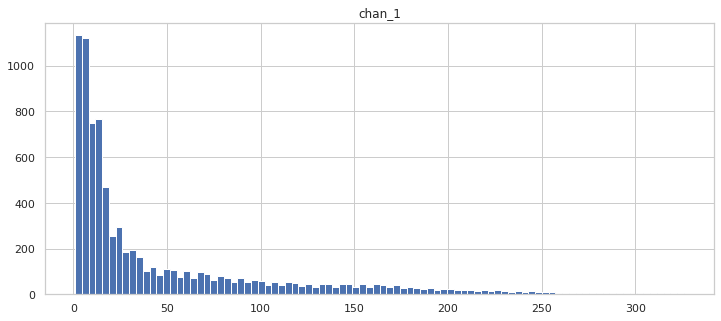

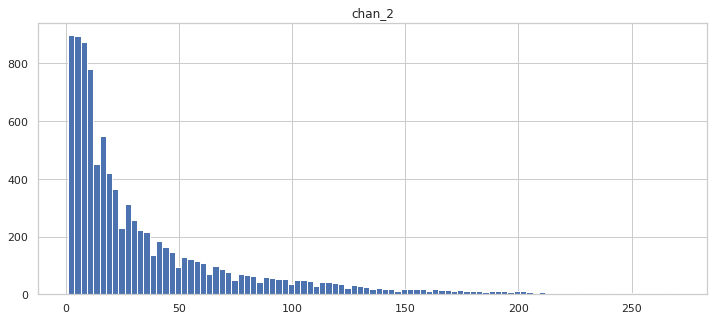

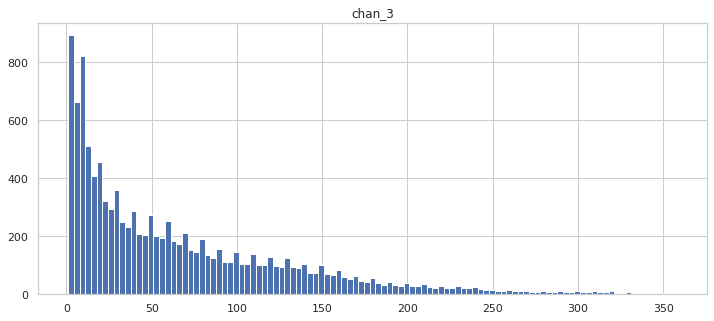

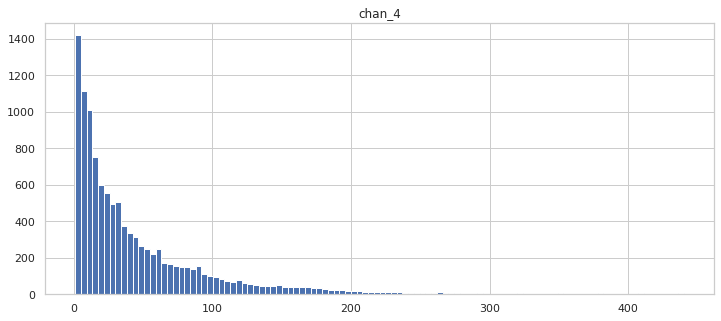

In [47]:
for col in idle_times_df.columns:
  plt.figure(figsize=(12, 5))
  data = idle_times_df[idle_times_df[col] > 0][col]
  plt.hist(data, bins=int(np.sqrt(len(data))))
  plt.title(col)
  plt.show()

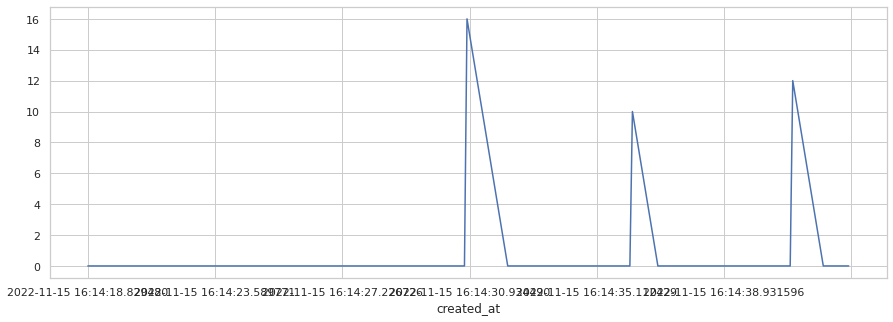

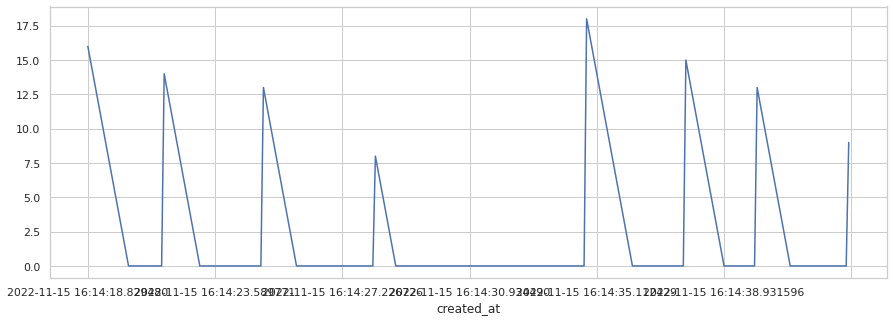

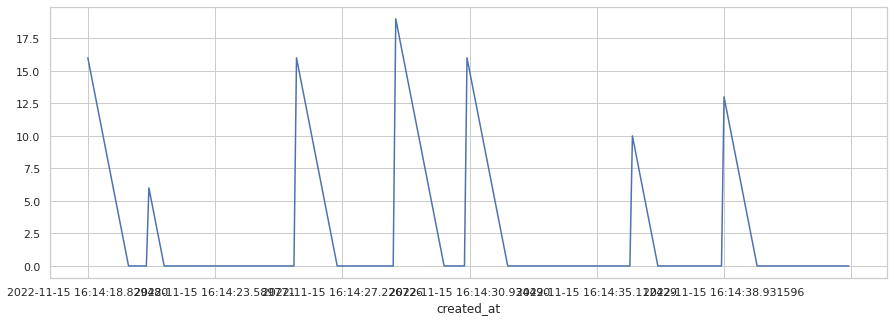

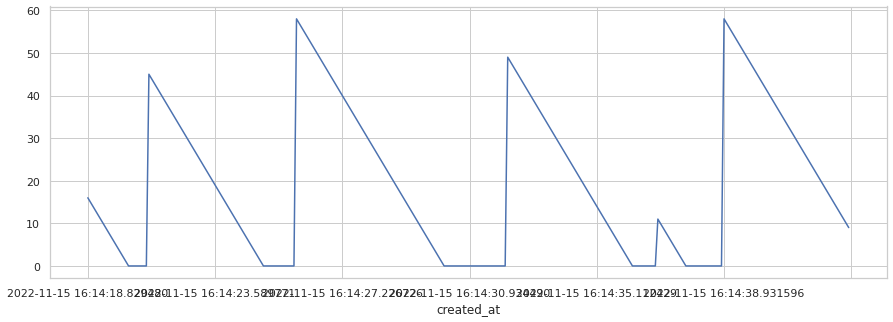

In [49]:
for col in idle_times_df.columns:
  idle_times_df[col][:300].plot()
  plt.show()

In [59]:
# non-stationarity test
from statsmodels.tsa.stattools import adfuller

for col in idle_times_df.columns:
  results = adfuller(idle_times_df[col])
  print(f"ADF statistics: {results[0]}")
  print(f"P-value: {results[1]}")
  print(f"Critical thresholds: \n{list(str(key)+': '+str(value) for key, value in results[4].items())}")

ADF statistics: -10.34568489407822
P-value: 2.614811215265332e-18
Critical thresholds: 
['1%: -3.430627483658607', '5%: -2.8616626390476827', '10%: -2.566835277236284']
ADF statistics: -12.672889243585745
P-value: 1.2335253345054854e-23
Critical thresholds: 
['1%: -3.430627483658607', '5%: -2.8616626390476827', '10%: -2.566835277236284']
ADF statistics: -10.782302421014005
P-value: 2.2390885901783504e-19
Critical thresholds: 
['1%: -3.430627483658607', '5%: -2.8616626390476827', '10%: -2.566835277236284']
ADF statistics: -10.68567943420681
P-value: 3.838841243593632e-19
Critical thresholds: 
['1%: -3.430627483658607', '5%: -2.8616626390476827', '10%: -2.566835277236284']


In [36]:
X2, y2 = df_to_X_y(idle_times_df)
X2.shape, y2.shape

((23560, 10, 4), (23560, 4))

In [37]:
X2_train, X2_temp, y2_train, y2_temp = train_test_split(X2, y2, test_size=0.2)
X2_test, X2_val, y2_test, y2_val = train_test_split(X2_temp, y2_temp, test_size=0.5)
X2_train.shape, X2_test.shape, X2_val.shape

((18848, 10, 4), (2356, 10, 4), (2356, 10, 4))

## Build the model 🧠

In [38]:
def build_model2(input_shape):
  return tf.keras.models.Sequential([
      tf.keras.layers.Input(input_shape),
      tf.keras.layers.LSTM(45, return_sequences=True),
      tf.keras.layers.LSTM(45, return_sequences=True),
      tf.keras.layers.LSTM(45),
      tf.keras.layers.Dense(45, activation="relu"),
      tf.keras.layers.Dense(4, activation="relu")
  ])

In [39]:
model2 = build_model2((X2.shape[1], X2.shape[2]))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 45)            9000      
                                                                 
 lstm_3 (LSTM)               (None, 10, 45)            16380     
                                                                 
 lstm_4 (LSTM)               (None, 45)                16380     
                                                                 
 dense_2 (Dense)             (None, 45)                2070      
                                                                 
 dense_3 (Dense)             (None, 4)                 184       
                                                                 
Total params: 44,014
Trainable params: 44,014
Non-trainable params: 0
_________________________________________________________________


In [69]:
model2.compile(loss="mse", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

In [70]:
history2 = model2.fit(X2_train, y2_train, batch_size=30, epochs=40, validation_data=(X2_val, y2_val))

Epoch 1/40
629/629 [==============================] - 20s 22ms/step - loss: 689.1460 - accuracy: 0.8551 - val_loss: 595.6484 - val_accuracy: 0.8413
Epoch 2/40
629/629 [==============================] - 13s 21ms/step - loss: 552.3014 - accuracy: 0.8511 - val_loss: 531.1359 - val_accuracy: 0.8391
Epoch 3/40
629/629 [==============================] - 13s 20ms/step - loss: 497.6680 - accuracy: 0.8497 - val_loss: 479.8138 - val_accuracy: 0.8332
Epoch 4/40
629/629 [==============================] - 12s 20ms/step - loss: 438.9656 - accuracy: 0.8505 - val_loss: 267.7250 - val_accuracy: 0.8311
Epoch 5/40
629/629 [==============================] - 12s 20ms/step - loss: 219.1550 - accuracy: 0.8511 - val_loss: 180.1367 - val_accuracy: 0.8357
Epoch 6/40
629/629 [==============================] - 12s 20ms/step - loss: 160.1496 - accuracy: 0.8534 - val_loss: 147.2069 - val_accuracy: 0.8357
Epoch 7/40
629/629 [==============================] - 13s 21ms/step - loss: 132.6196 - accuracy: 0.8543 - val_lo

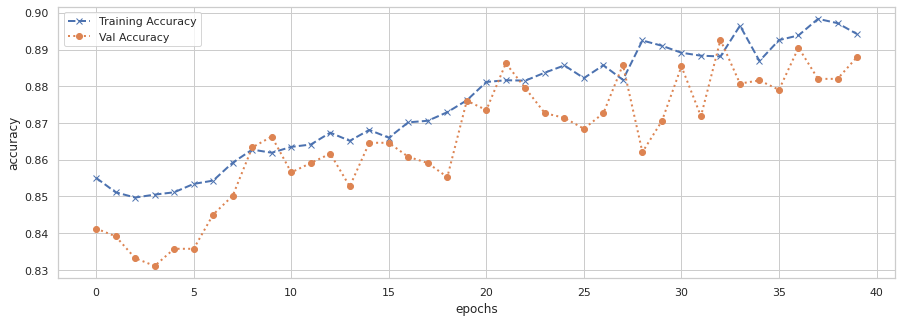

In [71]:
plt.plot(history2.history["accuracy"], label="Training Accuracy", marker="x", ls="--", linewidth=2)
plt.plot(history2.history["val_accuracy"], label="Val Accuracy", marker="o", ls=":", linewidth=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.savefig("training.png")

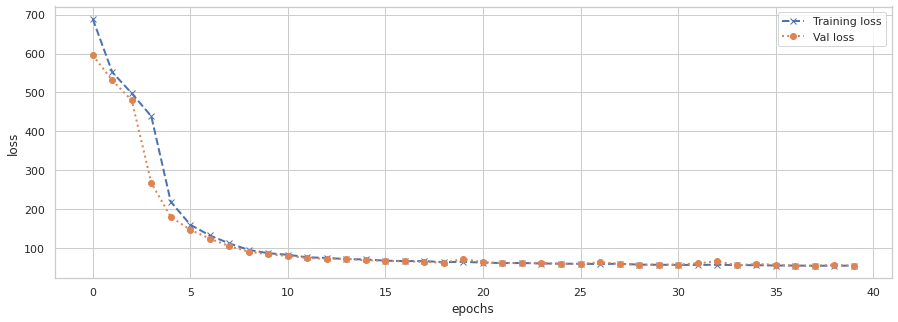

In [72]:
plt.plot(history2.history["loss"], label="Training loss", marker="x", ls="--", linewidth=2)
plt.plot(history2.history["val_loss"], label="Val loss", marker="o", ls=":", linewidth=2)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.savefig("loss.png")

In [73]:
test_preds = model2.predict(X2_test)
test_preds

74/74 [==============================] - 2s 6ms/step


array([[ 18.529926 ,  19.298088 ,   0.9981296,   0.       ],
       [  0.       ,   0.       ,   0.       ,  51.774696 ],
       [  0.       ,  44.154907 ,   1.1046937,  11.812793 ],
       ...,
       [ 23.9548   ,   2.275241 ,   4.6932735,   0.       ],
       [  1.4502091,   0.       ,  27.144924 ,   0.       ],
       [  4.0375113,   6.0637054, 164.5255   ,   3.8038898]],
      dtype=float32)

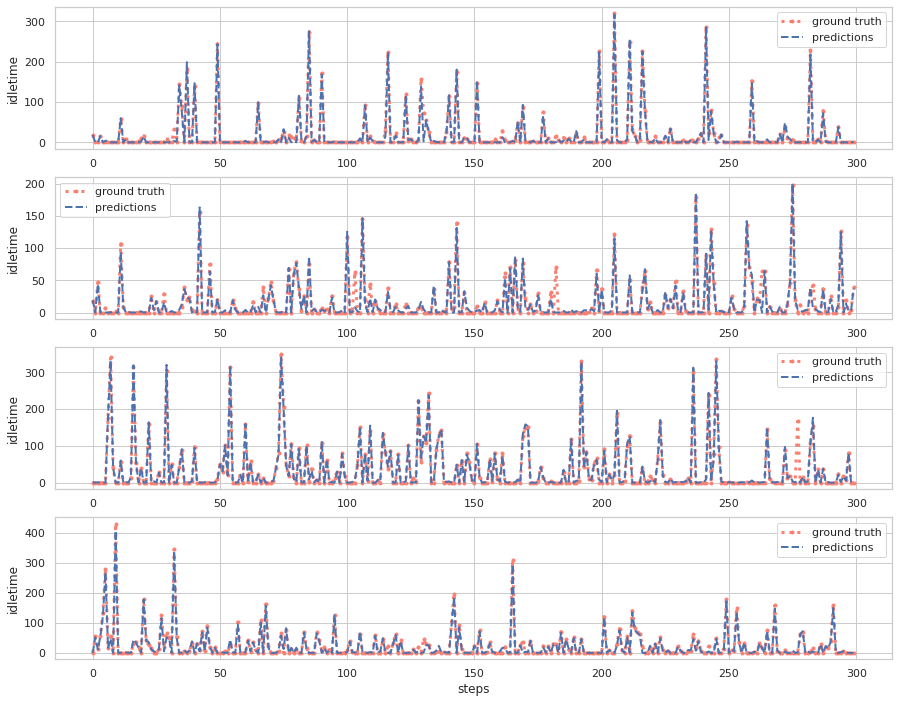

In [74]:
nchannels = y2.shape[1]
fig, ax = plt.subplots(nrows=nchannels, ncols=1, figsize=(15, 12))
for i in range(nchannels):
  ax[i].plot(y2_test[:300, i], label="ground truth", marker=".", ls=":", linewidth=3, color="salmon")
  ax[i].plot(test_preds[:300, i], label="predictions", ls="--", linewidth=2)
  ax[i].legend()
  ax[i].set_ylabel("idletime")
  if i == nchannels-1:
    ax[i].set_xlabel("steps")
plt.savefig("predictions.png")

# Save the model 💾

In [46]:
save_model(model2, "model2.tflite")